In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/hr_raw_data_final.csv', index_col=0)
pd.set_option('display.max_columns', None)
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


In [3]:
## Para ver que tipo de objeto es.
## En este caso 'O' representa 'Object' 

df["age"].dtype

dtype('O')

In [4]:
## Extraemos las filas donde los valores de la columna "age" estén formados por letras, en lugar de números.
## Utilizamos patrón Regex para localizar estos valores

df_age = df[df['age'].str.contains('[a-zA-Z]', regex=True)]
df_age.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
31,forty-seven,No,NaN,1032.487286,Research & Development,25,3,Medical,1,32,1,0,NaN,3,3,heALthCArE RePResEntaTIVe,3,NaN,"8339,32$","21682,23$",2,NaN,NaN,23,"4,0",2,NaN,0,"25,0",3,"3,0",17,NaN,12,11,"8339,32$",1976,NaN,heALthCArE RePResEntaTIVe - Research & Deve...,NaN,Yes
79,fifty-eight,No,travel_rarely,1431.238095,NaN,-18,4,NaN,1,80,4,0,NaN,3,4,saLes ExECutiVE,3,Single,"11560,00$","30056,00$",0,NaN,NaN,13,"3,0",3,Full Time,0,"38,0",1,"2,0",37,NaN,1,8,"11560,00$",1965,"138720,00$",NaN,NaN,1


In [5]:
## df_age.index: Obtiene el índice de todas las filas del DataFrame df_age.
## .tolist() Convierte el índice en una lista de valores.

lista_indices = df_age.index.tolist()

## Ver la lista de índices
lista_indices

[31, 79, 216, 357, 411, 426, 593, 1198, 1226, 1293, 1325, 1584, 1662]

In [6]:
## Extraemos las filas de la columna "age"

df.loc[:, "age"]

0       51
1       52
2       42
3       47
4       46
        ..
1673    43
1674    47
1675    29
1676    47
1677    32
Name: age, Length: 1678, dtype: object

In [7]:
## Sacamos los indices de las filas que tienen las letras, solo de la columna "age"

df.loc[lista_indices, "age"]

31       forty-seven
79       fifty-eight
216       thirty-six
357       fifty-five
411        fifty-two
426       thirty-one
593           thirty
1198      twenty-six
1226    thirty-seven
1293      thirty-two
1325     twenty-four
1584      thirty-two
1662     twenty-four
Name: age, dtype: object

In [8]:
## Creamos diccionario con los valores por los que vamos a reemplazar a continuación.

diccionario = {
    "forty-seven": 47,
    "fifty-eight": 58,
    "thirty-six": 36,
    "fifty-five": 55,
    "fifty-two": 52,
    "thirty-one": 31,
    "thirty": 30,
    "twenty-six": 26,
    "thirty-seven": 37,
    "thirty-two": 32,
    "twenty-four": 24,
}

## Reemplazamos los valores en nuestro df.

df["age"] = df["age"].replace(diccionario)

In [9]:
# Comprobamos que se han reemplazado.

df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


In [10]:
df.head()

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


In [11]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

In [12]:
# Eliminamos las columnas que no consideramos necesarias
df_2 = df.drop(columns=['department', 'employeecount', 'over18', 'yearsincurrentrole', 'sameasmonthlyincome', 'datebirth', 'roledepartament','numberchildren', 'hourlyrate'])

In [13]:
df_2.columns



Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'salary', 'remotework'],
      dtype='object')

In [14]:
df_2.head()

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,salary,remotework
0,51,No,NaN,2015.722222,6,3,NaN,1,1,0,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",Yes
1,52,No,NaN,2063.388889,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",1
2,42,No,travel_rarely,1984.253968,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,NaN,"41669,33$",1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",1
3,47,No,travel_rarely,1771.404762,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",False
4,46,No,NaN,1582.771346,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,0


In [15]:
# Separamos los nombres de las columnas, con un guión bajo
df_2.rename(columns={
    'age': 'age',
    'attrition': 'attrition',
    'businesstravel': 'business_travel',
    'dailyrate': 'daily_rate',
    'distancefromhome': 'distance_from_home',
    'education': 'education',
    'educationfield': 'education_field',
    'employeenumber': 'employee_number',
    'environmentsatisfaction': 'environment_satisfaction',
    'gender': 'gender',
    'hourlyrate': 'hourly_rate',
    'jobinvolvement': 'job_involvement',
    'joblevel': 'job_level',
    'jobrole': 'job_role',
    'jobsatisfaction': 'job_satisfaction',
    'maritalstatus': 'marital_status',
    'monthlyincome': 'monthly_income',
    'monthlyrate': 'monthly_rate',
    'numcompaniesworked': 'num_companies_worked',
    'overtime': 'overtime',
    'percentsalaryhike': 'percent_salary_hike',
    'performancerating': 'performance_rating',
    'relationshipsatisfaction': 'relationship_satisfaction',
    'standardhours': 'standard_hours',
    'stockoptionlevel': 'stock_option_level',
    'totalworkingyears': 'total_working_years',
    'trainingtimeslastyear': 'training_times_last_year',
    'worklifebalance': 'work_life_balance',
    'yearsatcompany': 'years_at_company',
    'yearssincelastpromotion': 'years_since_last_promotion',
    'yearswithcurrmanager': 'years_with_curr_manager',
    'salary': 'salary',
    'remotework': 'remote_work'
}, inplace=True
)

In [16]:
df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,0,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",Yes
1,52,No,NaN,2063.388889,1,4,Life Sciences,2,3,0,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",1
2,42,No,travel_rarely,1984.253968,4,2,Technical Degree,3,3,0,3,5,ManaGER,4,Married,NaN,"41669,33$",1,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",1
3,47,No,travel_rarely,1771.404762,2,4,Medical,4,1,1,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",False
4,46,No,NaN,1582.771346,3,3,Technical Degree,5,1,1,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,0


In [17]:
df_2[["education_field", "job_role", "marital_status", "overtime"]].dtypes

education_field    object
job_role           object
marital_status     object
overtime           object
dtype: object

In [18]:
# Cambiamos los datos a minúsculas 
df_2[["education_field", "job_role", "marital_status", "overtime"]] = df_2[["education_field", "job_role", "marital_status", "overtime"]].apply(lambda x: x.str.lower())


In [19]:
df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,0,3,5,research director,3,NaN,"16280,83$","42330,17$",7,no,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",Yes
1,52,No,NaN,2063.388889,1,4,life sciences,2,3,0,2,5,manager,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",1
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,0,3,5,manager,4,married,NaN,"41669,33$",1,no,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",1
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,1,3,4,research director,3,married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",False
4,46,No,NaN,1582.771346,3,3,technical degree,5,1,1,4,4,sales executive,1,divorced,"12783,92$","33238,20$",2,no,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,0


In [20]:
# Cambiamos género por m y f, en vez de 0 y 1 

df_2["gender"].replace(to_replace = [0,1], value = ['M', 'F'], inplace = True)


In [21]:
df_2[["remote_work"]].applymap(type).head()

,remote_work
0,<class 'str'>
1,<class 'str'>
2,<class 'str'>
3,<class 'str'>
4,<class 'str'>


In [22]:
df_2['remote_work'].unique()

array(['Yes', '1', 'False', '0', 'True'], dtype=object)

In [23]:
# Cambiamos la columna con replace.

diccionario_mapa = {"1": "Y", "0": "N", "True": "Y", "False": "N", "Yes": "Y", "No": "N"}
df_2["remote_work"] = df_2["remote_work"].map(diccionario_mapa)

df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,M,3,5,research director,3,NaN,"16280,83$","42330,17$",7,no,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",Y
1,52,No,NaN,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,NaN,"41669,33$",1,no,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",N
4,46,No,NaN,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,"12783,92$","33238,20$",2,no,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,N


In [24]:
# En la columna "marital_status" cambiamos marreid por married, que estaban en algunas filas
df_2['marital_status']= df_2['marital_status'].replace({'marreid':'married'})

In [25]:
df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,M,3,5,research director,3,NaN,"16280,83$","42330,17$",7,no,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,15,15,"195370,00$",Y
1,52,No,NaN,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,NaN,NaN,"43331,17$",0,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,11,9,"199990,00$",Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,NaN,"41669,33$",1,no,11,"3,0",4,NaN,0,"22,0",3,NaN,22,11,15,"192320,00$",Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,"14307,50$","37199,50$",3,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,5,6,"171690,00$",N
4,46,No,NaN,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,"12783,92$","33238,20$",2,no,12,"3,0",4,NaN,1,NaN,5,"3,0",19,2,8,NaN,N


In [26]:
df_2.dtypes

age                            object
attrition                      object
business_travel                object
daily_rate                    float64
distance_from_home              int64
education                       int64
education_field                object
employee_number                 int64
environment_satisfaction        int64
gender                         object
job_involvement                 int64
job_level                       int64
job_role                       object
job_satisfaction                int64
marital_status                 object
monthly_income                 object
monthly_rate                   object
num_companies_worked            int64
overtime                       object
percent_salary_hike             int64
performance_rating             object
relationship_satisfaction       int64
standard_hours                 object
stock_option_level              int64
total_working_years            object
training_times_last_year        int64
work_life_ba

In [27]:
# cambiamos comas por puntos
columnas_sin_comas = ['work_life_balance','performance_rating','monthly_income', 'monthly_rate', 'salary', 'total_working_years']
for columna in columnas_sin_comas:
    df_2[columna] = df_2[columna].str.replace(",",".")


In [28]:
# cambiamos guiones columna business_travel 
columna_bt = ['business_travel']
for columna in columna_bt:
    df_2[columna] = df_2[columna].str.replace("-","_")

In [29]:
df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,M,3,5,research director,3,NaN,16280.83$,42330.17$,7,no,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,195370.00$,Y
1,52,No,NaN,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,NaN,NaN,43331.17$,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,11,9,199990.00$,Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,NaN,41669.33$,1,no,11,3.0,4,NaN,0,22.0,3,NaN,22,11,15,192320.00$,Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50$,37199.50$,3,NaN,19,3.0,2,Full Time,2,NaN,2,NaN,20,5,6,171690.00$,N
4,46,No,NaN,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92$,33238.20$,2,no,12,3.0,4,NaN,1,NaN,5,3.0,19,2,8,NaN,N


In [30]:
columnas1 = ["monthly_rate", "salary", 'monthly_income']

def cambiar_simbolo(columnas): 
    try:
        return columnas.str.replace("$","")
    except:
        return np.nan

for columna in columnas1:
    df_2[columna] = cambiar_simbolo(df_2[columna])

df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,M,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,195370.00,Y
1,52,No,NaN,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,11,9,199990.00,Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,NaN,41669.33,1,no,11,3.0,4,NaN,0,22.0,3,NaN,22,11,15,192320.00,Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3.0,2,Full Time,2,NaN,2,NaN,20,5,6,171690.00,N
4,46,No,NaN,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,NaN,1,NaN,5,3.0,19,2,8,NaN,N


In [31]:
# Pasamos a tipo a float

df_2[columna]
df_2["monthly_rate"] = df_2["monthly_rate"].astype(float).round(2)
df_2["salary"] = df_2["salary"].astype(float)
df_2["monthly_income"] = df_2["monthly_income"].astype(float)

In [32]:
df_2.dtypes

age                            object
attrition                      object
business_travel                object
daily_rate                    float64
distance_from_home              int64
education                       int64
education_field                object
employee_number                 int64
environment_satisfaction        int64
gender                         object
job_involvement                 int64
job_level                       int64
job_role                       object
job_satisfaction                int64
marital_status                 object
monthly_income                float64
monthly_rate                  float64
num_companies_worked            int64
overtime                       object
percent_salary_hike             int64
performance_rating             object
relationship_satisfaction       int64
standard_hours                 object
stock_option_level              int64
total_working_years            object
training_times_last_year        int64
work_life_ba

In [33]:
df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,M,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,195370.0,Y
1,52,No,NaN,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,11,9,199990.0,Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,NaN,41669.33,1,no,11,3.0,4,NaN,0,22.0,3,NaN,22,11,15,192320.0,Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3.0,2,Full Time,2,NaN,2,NaN,20,5,6,171690.0,N
4,46,No,NaN,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,NaN,1,NaN,5,3.0,19,2,8,NaN,N


In [34]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
daily_rate,1678.0,668.079714,470.787298,104.103175,290.03551,556.256661,971.956349,2063.388889
distance_from_home,1678.0,4.504172,14.652066,-49.000000,2.00000,5.000000,11.000000,29.000000
education,1678.0,2.932658,1.024270,1.000000,2.00000,3.000000,4.000000,5.000000
employee_number,1678.0,809.859952,467.084867,1.000000,403.25000,813.500000,1215.750000,1614.000000
environment_satisfaction,1678.0,4.264005,6.912695,1.000000,2.00000,3.000000,4.000000,49.000000
job_involvement,1678.0,2.740763,0.710359,1.000000,2.00000,3.000000,3.000000,4.000000
job_level,1678.0,2.064362,1.099425,1.000000,1.00000,2.000000,3.000000,5.000000
job_satisfaction,1678.0,2.743147,1.105172,1.000000,2.00000,3.000000,4.000000,4.000000
monthly_income,1189.0,5676.787065,6157.859086,1000.000000,2342.59000,4492.840000,7861.670000,94083.000000
monthly_rate,1678.0,14029.674648,9886.532728,2186.170000,6090.75000,11681.390000,20411.080000,43331.170000


In [35]:
# Cambiamos los valores negativos de la columna "distance_from_home"
def sustituir_negativos(df, columna):
    df.loc[df[columna] < 0, columna] = df[columna].abs()
    return df

sustituir_negativos(df_2, "distance_from_home")

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,NaN,2015.722222,6,3,NaN,1,1,M,3,5,research director,3,NaN,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,195370.00,Y
1,52,No,NaN,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,11,9,199990.00,Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,NaN,41669.33,1,no,11,3.0,4,NaN,0,22.0,3,NaN,22,11,15,192320.00,Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,NaN,19,3.0,2,Full Time,2,NaN,2,NaN,20,5,6,171690.00,N
4,46,No,NaN,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,NaN,1,NaN,5,3.0,19,2,8,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,NaN,488.944444,26,3,medical,824,2,F,4,1,research scientist,3,single,3949.17,10267.83,4,NaN,12,3.0,4,NaN,0,NaN,2,3.0,3,1,2,NaN,Y
1674,47,No,NaN,1973.984127,26,4,NaN,1087,4,F,3,5,manager,3,married,15943.72,41453.67,3,no,11,3.0,3,Full Time,1,27.0,2,3.0,5,1,0,191324.62,N
1675,29,No,travel_rarely,290.035510,15,3,NaN,528,3,M,3,1,research scientist,4,NaN,NaN,6090.75,1,no,19,3.0,1,Part Time,0,6.0,1,3.0,6,1,5,28111.13,N
1676,47,No,travel_rarely,1032.487286,4,3,life sciences,76,3,F,2,3,manufacturing director,2,divorced,8339.32,21682.23,8,yes,12,NaN,3,Part Time,1,NaN,4,3.0,22,14,10,100071.84,Y


In [36]:
df_2['distance_from_home'].unique()

array([ 6,  1,  4,  2,  3, 22, 25,  9,  7, 23, 10, 12, 14, 13, 15,  8, 42,
       28, 37,  5, 16, 35, 26, 24, 29, 17, 21, 18, 30, 27, 20, 31, 39, 11,
       19, 33, 34, 46, 36, 45, 47, 32, 41, 49, 48, 38, 43, 40, 44])

In [37]:
# IMPUTACIÓN DE NULOS

In [38]:
# VARIABLES CATEGORICAS

nulos_cat = df_2[df_2.columns[df_2.isnull().any()]].select_dtypes(include = "O").columns
print(f'las columnas categóricas que tienen nulos son:\n {nulos_cat}\n')

las columnas categóricas que tienen nulos son:
 Index(['business_travel', 'education_field', 'marital_status', 'overtime',
       'performance_rating', 'standard_hours', 'total_working_years',
       'work_life_balance'],
      dtype='object')



In [39]:
for col in nulos_cat:
    print(f'la distribución de las categorías por columna {col.upper()} es:')
    display(df_2[col].value_counts() / df_2.shape[0])
    print('----------')

la distribución de las categorías por columna BUSINESS_TRAVEL es:


business_travel
travel_rarely        0.367104
travel_frequently    0.100119
non_travel           0.055423
Name: count, dtype: float64

----------
la distribución de las categorías por columna EDUCATION_FIELD es:


education_field
life sciences       0.218713
medical             0.170441
marketing           0.063170
technical degree    0.041716
other               0.037545
human resources     0.007151
Name: count, dtype: float64

----------
la distribución de las categorías por columna MARITAL_STATUS es:


marital_status
married     0.271156
single      0.204410
divorced    0.122169
Name: count, dtype: float64

----------
la distribución de las categorías por columna OVERTIME es:


overtime
no     0.425507
yes    0.159714
Name: count, dtype: float64

----------
la distribución de las categorías por columna PERFORMANCE_RATING es:


performance_rating
3.0    0.749106
4.0    0.131704
Name: count, dtype: float64

----------
la distribución de las categorías por columna STANDARD_HOURS es:


standard_hours
Part Time    0.552443
Full Time    0.238379
Name: count, dtype: float64

----------
la distribución de las categorías por columna TOTAL_WORKING_YEARS es:


total_working_years
10.0    0.089988
6.0     0.052443
8.0     0.051251
9.0     0.042312
5.0     0.040524
7.0     0.035161
4.0     0.033969
1.0     0.032777
3.0     0.020262
12.0    0.020262
13.0    0.018474
11.0    0.018474
14.0    0.018474
20.0    0.017878
16.0    0.017878
15.0    0.016687
18.0    0.016687
21.0    0.013707
17.0    0.013707
2.0     0.012515
22.0    0.011323
19.0    0.010131
24.0    0.008343
28.0    0.008343
23.0    0.007747
26.0    0.004768
0.0     0.004768
37.0    0.004172
36.0    0.003576
29.0    0.003576
27.0    0.003576
25.0    0.003576
33.0    0.003576
31.0    0.002384
40.0    0.002384
32.0    0.001788
35.0    0.001788
30.0    0.001788
34.0    0.001192
38.0    0.000596
Name: count, dtype: float64

----------
la distribución de las categorías por columna WORK_LIFE_BALANCE es:


work_life_balance
3.0    0.563766
2.0    0.222884
4.0    0.096544
1.0    0.048868
Name: count, dtype: float64

----------


1. BUSINESS_TRAVEL: Como no hay categoria dominante, entonces lo reemplazaremos los nulos por una categoría nueva "Unknown". 
2. EDUCATION_FIELD: Como no hay categoria dominante, entonces lo reemplazaremos los nulos por una categoría nueva "Unknown". 
3. MARITAL_STATUS: Como no hay categoria dominante, entonces lo reemplazaremos los nulos por una categoría nueva "Unknown". 
4. OVERTIME: Como no hay categoria dominante, entonces lo reemplazaremos los nulos por una categoría nueva "Unknown". 
5. PERFORMANCE_RATING: en esta columna encontramos que casi el 75% tienen calificación de 3.0, optamos por reemplazar los nulos por la categoría dominante o moda. 
6. STANDARD_HOURS: Como no hay categoria dominante, entonces lo reemplazaremos los nulos por una categoría nueva "Unknown". 
7. TOTAL_WORKING_YEARS: Como no hay categoria dominante, entonces lo reemplazaremos los nulos por una categoría nueva "Unknown". 
8. WORK_LIFE_BALANCE: Como no hay categoria dominante, entonces lo reemplazaremos los nulos por una categoría nueva "Unknown". 

In [40]:
df_2.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'salary', 'remote_work'],
      dtype='object')

In [41]:
# Creamos dos listas, una con los nombres de las columnas que reemplazaremos por la moda y otra para las columnas que reemplazaremos por una categoría nueva "Unknown"
columnas_moda = ["performance_rating"]
columnas_unknown = ["business_travel", "education_field", "marital_status", "overtime", "standard_hours", "total_working_years", "work_life_balance"]

In [42]:
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Uknown"
for columna in columnas_unknown:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df_2[columna] = df_2[columna].fillna("Unknown")

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_2[columnas_unknown].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


business_travel        0
education_field        0
marital_status         0
overtime               0
standard_hours         0
total_working_years    0
work_life_balance      0
dtype: int64

In [43]:
# iteramos por la lista creada en el paso anterior:
for columna in columnas_moda:
    
    moda = df_2[columna].mode()[0]    
    
    df_2[columna] = df_2[columna].fillna(moda)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

df_2[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


performance_rating    0
dtype: int64

In [44]:
# VARIABLES NUMERICAS 
nulos_esta_num = df_2[df_2.columns[df_2.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['monthly_income', 'salary'], dtype='object')


In [45]:
df_2[nulos_esta_num].isnull().sum() / df_2.shape[0]

monthly_income    0.291418
salary            0.169845
dtype: float64

In [46]:
# Hemos observado que el salario está dividido en 12 pagas y es el resultado es "monthly_income" y 
# que si multiplicamos monthly_income por 12, nos da el resultado de "salary", por lo que optaremos por tomar 
# datos de ambas columnas para sustituir los valores faltantes.

In [47]:
df_2["salary"] = df_2["salary"].fillna(df_2["monthly_income"] * 12).round(2)

In [48]:
df_2["monthly_income"] = df_2["monthly_income"].fillna(df_2["salary"] / 12).round(2)

In [49]:
df_2.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.00,Y
1,52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.00,Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,Unknown,0,22.0,3,Unknown,22,11,15,192320.00,Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,Unknown,2,Unknown,20,5,6,171690.00,N
4,46,No,Unknown,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,Unknown,1,Unknown,5,3.0,19,2,8,153407.04,N


In [50]:
# cambiamos los 'monthly_income' de los 'employee_number' que nos indicó César 
# 1317, 1360,1465

In [51]:
df_2.loc[df_2['employee_number'] == 1317, 'monthly_income'] = round(df_2.loc[df_2['employee_number'] == 1317, 'salary'] / 12, 3)

In [52]:
df_2.loc[df_2['employee_number'] == 1360, 'monthly_income'] = round(df_2.loc[df_2['employee_number'] == 1360, 'salary'] / 12, 3)

In [53]:
df_2.loc[df_2['employee_number'] == 1465, 'monthly_income'] = round(df_2.loc[df_2['employee_number'] == 1465, 'salary'] / 12, 3)

In [54]:
df_2[df_2["employee_number"]== 1317]

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
1316,20,Yes,Unknown,104.103175,10,1,medical,1317,4,M,3,1,research scientist,3,single,840.833,2186.17,1,Unknown,11,3.0,4,Part Time,0,Unknown,5,3.0,1,1,1,10090.0,Y


In [55]:
df_2[df_2["employee_number"]== 1360]

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
1359,28,No,travel_rarely,108.539683,10,1,medical,1360,4,M,3,1,sales representative,2,married,876.667,2279.33,1,no,22,4.0,2,Unknown,0,Unknown,5,3.0,1,0,0,10520.0,Y


In [56]:
df_2.to_csv("../data/df_clean.csv",index=False)

In [57]:
df_clean = pd.read_csv("../data/df_clean.csv")
df_clean.head()

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.00,Y
1,52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.00,Y
2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,Unknown,0,22.0,3,Unknown,22,11,15,192320.00,Y
3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,Unknown,2,Unknown,20,5,6,171690.00,N
4,46,No,Unknown,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,Unknown,1,Unknown,5,3.0,19,2,8,153407.04,N


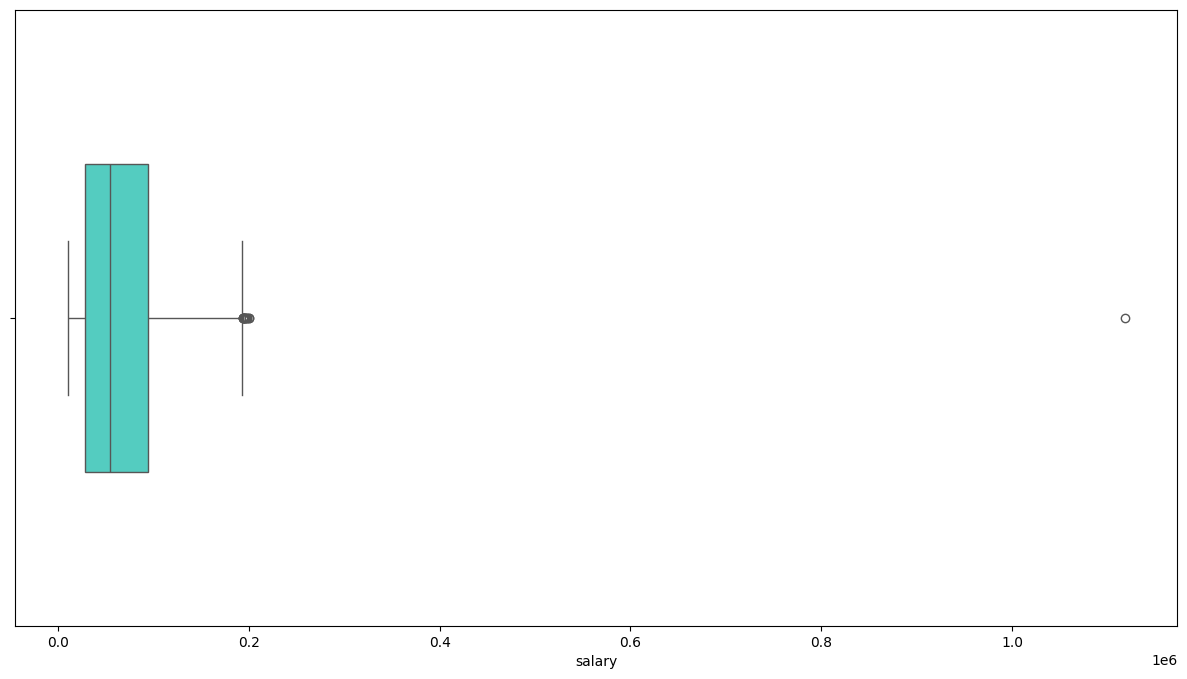

In [58]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 8))

sns.boxplot(x = "salary", 
            data = df_clean, 
            width = 0.5, 
            color = "turquoise");

##### Hemos identificado muchos valores atípicos (outliers) que están muy alejados de la mayoría de los valores, como un salario excesivamente alto que se muestra fuera de los bigotes del boxplot. Puede ser indicativo de un error de captura o de un dato anómalo que no refleja correctamente la realidad.
##### En este caso, consideramos que ese dato es erróneo y hemos procedido a sustituirlo por la media de la categoría 'job_level' a la que pertenece la persona que lo percibe, lo que permitirá mantener la integridad de los datos para análisis posteriores.

In [59]:
df_clean["salary"].mean()

np.float64(65411.947437425515)

In [60]:
df_clean["salary"].median()

np.float64(53914.11)

In [61]:
df_clean["salary"].max()

np.float64(1118004.0)

In [62]:
df_clean[df_clean["salary"]== 1118004.0]

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
1386,25,Yes,travel_frequently,115.349206,32,1,Unknown,1387,3,M,1,1,sales representative,4,single,93167.0,2422.33,1,yes,14,3.0,4,Unknown,0,1.0,4,3.0,1,1,0,1118004.0,Y


In [63]:
df_clean.groupby("job_level")["salary"].mean()

job_level
1     29940.815931
2     53900.385340
3    100085.944627
4    153517.093246
5    191191.972152
Name: salary, dtype: float64

In [64]:
df_clean.replace(1118004.0, 29940.8, inplace=True)

In [65]:
# Ahora dividimos el nuevo salario por 12, para reemplazar el 'monthly_income'
df_clean.loc[df_clean['employee_number'] == 1387, 'monthly_income'] = round(df_clean.loc[df_clean['employee_number'] == 1387, 'salary'] / 12, 2)


In [66]:
df_clean[df_clean["employee_number"]== 1387]

,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
1386,25,Yes,travel_frequently,115.349206,32,1,Unknown,1387,3,M,1,1,sales representative,4,single,2495.07,2422.33,1,yes,14,3.0,4,Unknown,0,1.0,4,3.0,1,1,0,29940.8,Y


In [67]:
df_2.to_csv("../data/df_final.csv",index=False)

In [68]:
duplicated_rows = df_clean[df_clean.duplicated()]
print("Filas duplicadas en todo el DataFrame:")
print(duplicated_rows)

Filas duplicadas en todo el DataFrame:
      age attrition business_travel   daily_rate  distance_from_home  \
1614   35        No         Unknown  1032.487286                  18   
1615   59        No   travel_rarely   290.035510                   6   
1616   30        No   travel_rarely  1032.487286                   5   
1617   34       Yes   travel_rarely   556.256661                  24   
1618   47        No         Unknown   290.035510                   2   
...   ...       ...             ...          ...                 ...   
1673   43        No         Unknown   488.944444                  26   
1674   47        No         Unknown  1973.984127                  26   
1675   29        No   travel_rarely   290.035510                  15   
1676   47        No   travel_rarely  1032.487286                   4   
1677   32        No         Unknown   556.256661                   2   

      education education_field  employee_number  environment_satisfaction  \
1614          5   

In [69]:
print(df_clean['employee_number'].duplicated().sum())

64


In [70]:
df_clean=df_clean.drop_duplicates()

In [71]:
print(df_clean['employee_number'].duplicated().sum())

0


In [72]:
df_clean.to_csv("df_final.csv")

In [73]:
pd.read_csv("df_final.csv")

,Unnamed: 0,age,attrition,business_travel,daily_rate,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,salary,remote_work
0,0,51,No,Unknown,2015.722222,6,3,Unknown,1,1,M,3,5,research director,3,Unknown,16280.83,42330.17,7,no,13,3.0,3,Full Time,0,Unknown,5,3.0,20,15,15,195370.00,Y
1,1,52,No,Unknown,2063.388889,1,4,life sciences,2,3,M,2,5,manager,3,Unknown,16665.83,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,199990.00,Y
2,2,42,No,travel_rarely,1984.253968,4,2,technical degree,3,3,M,3,5,manager,4,married,16026.67,41669.33,1,no,11,3.0,4,Unknown,0,22.0,3,Unknown,22,11,15,192320.00,Y
3,3,47,No,travel_rarely,1771.404762,2,4,medical,4,1,F,3,4,research director,3,married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,Unknown,2,Unknown,20,5,6,171690.00,N
4,4,46,No,Unknown,1582.771346,3,3,technical degree,5,1,F,4,4,sales executive,1,divorced,12783.92,33238.20,2,no,12,3.0,4,Unknown,1,Unknown,5,3.0,19,2,8,153407.04,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,1609,36,Yes,travel_rarely,1065.277778,3,1,life sciences,1610,3,M,2,3,sales executive,4,married,8604.17,22370.83,1,Unknown,11,3.0,1,Full Time,1,Unknown,6,3.0,16,3,7,103250.00,N
1610,1610,45,No,non_travel,458.817460,4,2,Unknown,1611,3,M,3,2,laboratory technician,2,Unknown,3705.83,9635.17,1,Unknown,12,3.0,2,Part Time,0,Unknown,5,2.0,9,0,8,44470.00,Y
1611,1611,39,No,travel_rarely,1032.487286,13,5,Unknown,1612,13,M,4,3,sales executive,3,single,8339.32,21682.23,0,no,18,3.0,4,Part Time,0,9.0,3,3.0,8,0,7,100071.84,Y
1612,1612,36,No,non_travel,556.256661,8,4,technical degree,1613,1,M,3,2,sales executive,4,divorced,4492.84,11681.39,4,no,13,3.0,4,Part Time,2,12.0,3,3.0,7,0,7,53914.11,Y
